# Tarea 4. Midiendo rendimiento y riesgo en un portafolio.

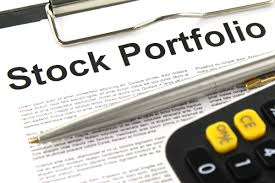

**Resumen.**
> En esta tarea, calcularás medidas de rendimiento esperado diario y volatilidad para cuatro diferentes portafolios. Usarás los históricos de precios que ya descargaste en la tarea anterior.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea4_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea4_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Descarga de datos (10 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), Microsoft (MSFT), Walgreens (WBA), y Tesla Motors (TSLA) durante el periodo comprendido del primero de enero del 2015 hasta el 31 de diciembre del 2019.

1. Mostrar el DataFrame de los precios diarios (2 puntos).
2. Graficar los precios (3 puntos).
3. Mostrar el DataFrame de los rendimientos porcentuales diarios (2 puntos).
4. Graficar los rendimientos (3 puntos).

In [66]:
# Importar librerias
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import pandas_datareader.data as web
#Función de descarga
def get_closes(tickers, start_date=None, end_date=None, freq=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [67]:
#Data
tickers = ['^GSPC','MSFT', 'WBA','TSLA']
start_date = '2015-01-01'
end_date =  '2019-12-31'
daily_closes = get_closes(tickers=tickers, start_date= start_date, end_date=end_date, freq='d')
daily_closes.head()

,^GSPC,MSFT,WBA,TSLA
Date,,,,
2015-01-02,2058.199951,41.864841,67.541489,219.309998
2015-01-05,2020.579956,41.479866,66.208420,210.089996
2015-01-06,2002.609985,40.871037,66.377274,211.279999
2015-01-07,2025.900024,41.390320,68.074707,210.949997
2015-01-08,2062.139893,42.607944,68.918983,210.619995


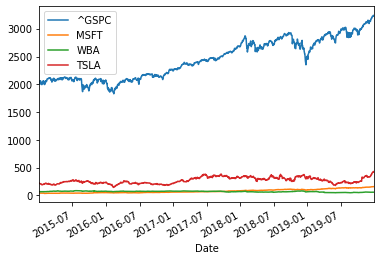

In [68]:
# Gráficar
daily_closes.plot()

In [69]:
#rendimientos porcentuales diarios
rend_daily = daily_closes.pct_change().dropna()
rend_daily.head()

,^GSPC,MSFT,WBA,TSLA
Date,,,,
2015-01-05,-0.018278,-0.009196,-0.019737,-0.042041
2015-01-06,-0.008893,-0.014678,0.002550,0.005664
2015-01-07,0.011630,0.012705,0.025573,-0.001562
2015-01-08,0.017888,0.029418,0.012402,-0.001564
2015-01-09,-0.008404,-0.008405,-0.024243,-0.018802


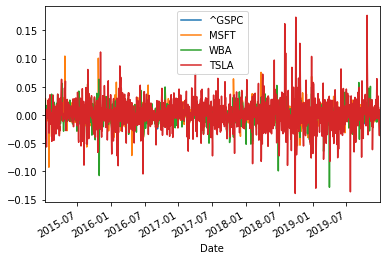

In [70]:
rend_daily.plot()

## 2. Rendimiento esperado y volatilidad para cada activo (20 puntos)

Usando los datos de rendimientos diarios de MSFT, WBA, y TSLA:

1. Reportar en un DataFrame el rendimiento esperado diario y la volatilidad diaria para cada activo. Reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada activo (10 puntos).
2. Calcular la matriz de varianza-covarianza (base diaria) para los activos MSFT, WBA, y TSLA (5 puntos).
3. Calcular la matriz de correlación (base diaria) para los activos MSFT, WBA, y TSLA (5 puntos).

Para este punto, investigar los métodos `cov` y `corr` de los objetos tipo `pd.DataFrame`.

In [71]:
# Rendimiento esperado y volatilidad diaria
d_summary = pd.DataFrame(columns=tickers)
d_summary.loc['Daily R'] = rend_daily.mean()
d_summary.loc['Daily V'] = rend_daily.std()
d_summary

,^GSPC,MSFT,WBA,TSLA
Daily R,0.000395,0.001161,0.000006,0.000913
Daily V,0.008466,0.014686,0.015506,0.028312


In [72]:
# Rendimiento esperado y volatilidad anualizado
d_summary.loc['Annual R'] = rend_daily.mean()*252
d_summary.loc['Annual V'] = rend_daily.std()*np.sqrt(252)
d_summary

,^GSPC,MSFT,WBA,TSLA
Daily R,0.000395,0.001161,0.000006,0.000913
Daily V,0.008466,0.014686,0.015506,0.028312
Annual R,0.099454,0.292548,0.001609,0.230067
Annual V,0.134390,0.233130,0.246148,0.449436


In [73]:
#Matriz de covarianza
cov_matrix = rend_daily.cov() 
cov_matrix

,^GSPC,MSFT,WBA,TSLA
^GSPC,0.000072,0.000094,0.000069,0.000091
MSFT,0.000094,0.000216,0.000084,0.000129
WBA,0.000069,0.000084,0.000240,0.000100
TSLA,0.000091,0.000129,0.000100,0.000802


In [74]:
#Matriz de cov de MSFT,WBA y TSLA
corr_matrix = rend_daily.iloc[:,1:].corr()
corr_matrix

,MSFT,WBA,TSLA
MSFT,1.000000,0.369590,0.311284
WBA,0.369590,1.000000,0.228469
TSLA,0.311284,0.228469,1.000000


## 3. Rentimiento esperado y volatilidad para portafolios (45 puntos)

1. Calcular los rendimientos diarios de los siguientes portafolios. Reportar en un DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior tratando cada portafolio como si fuera un activo individual (20 puntos).
 - Portafolio 1: igualmente ponderado entre MSFT, WBA, y TSLA.
 - Portafolio 2: 30% MSFT, 20% WBA, y 50% TSLA.
 - Portafolio 3: 50% MSFT, 30% WBA, y 20% TSLA.
 - Portafolio 4: 20% MSFT, 50% WBA, y 30% TSLA.
2. Para cada uno de los anteriores portafolios, reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior mediante las fórmulas de rendimiento esperado y volatilidad para portafolios derivadas en clase (20 puntos).
3. Comparar los resultados del punto uno con los del punto dos (5 puntos).

In [75]:
d_summary_2 = d_summary.iloc[:,1:]
d_summary_2

,MSFT,WBA,TSLA
Daily R,0.001161,0.000006,0.000913
Daily V,0.014686,0.015506,0.028312
Annual R,0.292548,0.001609,0.230067
Annual V,0.233130,0.246148,0.449436


In [79]:
rend_daily['Port 1'] = ((rend_daily.MSFT/3)+(rend_daily.WBA/3)+(rend_daily.TSLA/3))
rend_daily['Port 2'] = ((rend_daily.MSFT*.3)+(rend_daily.WBA*.2)+(rend_daily.TSLA*.5))
rend_daily['Port 3'] = ((rend_daily.MSFT*.5)+(rend_daily.WBA*.3)+(rend_daily.TSLA*.2))
rend_daily['Port 4'] = ((rend_daily.MSFT*.2)+(rend_daily.WBA*.5)+(rend_daily.TSLA*.3))
rend_daily.head()

,^GSPC,MSFT,WBA,TSLA,Port 1,Port 2,Port 3,Port 4
Date,,,,,,,,
2015-01-05,-0.018278,-0.009196,-0.019737,-0.042041,-0.023658,-0.027727,-0.018927,-0.024320
2015-01-06,-0.008893,-0.014678,0.002550,0.005664,-0.002154,-0.001061,-0.005441,0.000039
2015-01-07,0.011630,0.012705,0.025573,-0.001562,0.012239,0.008145,0.013712,0.014859
2015-01-08,0.017888,0.029418,0.012402,-0.001564,0.013419,0.010524,0.018117,0.011615
2015-01-09,-0.008404,-0.008405,-0.024243,-0.018802,-0.017150,-0.016771,-0.015236,-0.019443


In [90]:
d_summary_3 = pd.DataFrame(columns = rend_daily.columns)
d_summary_3.loc['Daily R'] = rend_daily.mean()
d_summary_3.loc['Daily V'] = rend_daily.std()
d_summary_3.loc['Annual R'] = rend_daily.mean()*252
d_summary_3.loc['Annual V'] = rend_daily.std()*np.sqrt(252)
d_summary_3

,^GSPC,MSFT,WBA,TSLA,Port 1,Port 2,Port 3,Port 4
Daily R,0.000395,0.001161,0.000006,0.000913,0.000693,0.000806,0.000765,0.000509
Daily V,0.008466,0.014686,0.015506,0.028312,0.014474,0.017274,0.013069,0.014259
Annual R,0.099454,0.292548,0.001609,0.230067,0.174741,0.203120,0.192770,0.128334
Annual V,0.134390,0.233130,0.246148,0.449436,0.229766,0.274222,0.207458,0.226360


## 4. Gráfico de rendimientos esperados vs. volatilidad (25 puntos)

1. Crear un gráfico de puntos que muestre el rendimiento esperado y la volatilidad para cada uno de los activos, el índice S&P500, y los cuatro portafolios en el espacio rendimiento esperado (eje y) contra volatilidad (eje x). Etiquetar cada uno de los puntos y los ejes apropiadamente (15 puntos).
2. ¿Qué puede concluir acerca de la posición en el gráfico de los portafolios respecto a los activos? (10 puntos)

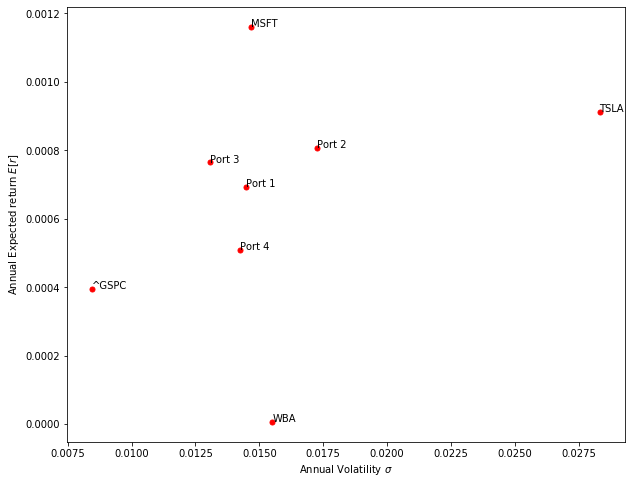

In [93]:
# Gráfico rendimiento esperado vs. volatilidad
x_points = d_summary_3.loc['Annual V'].values
y_points = d_summary_3.loc['Annual R'].values
plt.figure(figsize=(10,8))
plt.plot(x_points, y_points, 'ro', ms=5)
plt.xlabel('Annual Volatility $\sigma$')
plt.ylabel('Annual Expected return $E[r]$')
#Etiqueta de cada instrumento
for i in range(0,8):
    plt.text(x_points[i], y_points[i],d_summary_3.columns[i])

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>